# Assignment 1: Data Parsing, Cleansing and Integration
## Tasks 1 and 2
#### Student Name: Pratham Radhakrishna
#### Student ID: S3997064



## Introduction
Objectives:
The primary objective of Task 1 was to parse and cleanse a dataset containing clothing reviews to ensure data quality and integrity. This involved reading the data from an XML file, identifying and addressing various data issues, and converting the data into a Pandas DataFrame for further analysis.

Problems Tackled:
Parsing Data: The task involved parsing an XML file   and load it into a Pandas DataFrame.
Data Cleansing: The task required identifying and fixing common data issues such as typos, irregularities, integrity constraint violations, outliers, duplications, missing values, and inconsistencies.
Problems Discovered:
Typos and Spelling Mistakes: Inconsistent and incorrect spellings in categorical columns such as Section, Department, and Category.
Irregularities: Abnormal data values and formats, such as negative values in the Cost column.
Integrity Constraint Violations: Negative values in columns that should only contain positive values (e.g., Cost).
Outliers: Extremely high values in columns like Online Time.
Inconsistencies: Inconsistent data representations, such as mixed case spellings in categorical columns.
Approaches Chosen:
Parsing XML Data: Used Python's xml.etree.ElementTree module to parse the XML file and extract data into a structured format.
Loading Data into DataFrame: Converted the parsed data into a Pandas DataFrame for easier manipulation and analysis.
Correcting Typos and Spelling Mistakes: Created mapping dictionaries to correct known typos and inconsistencies in categorical columns.
Handling Outliers: Used the interquartile range (IQR) method to identify and cap extreme values in columns like Online Time.
Ensuring Data Integrity: Applied constraints to ensure columns like Cost only contained positive values, replacing any negative values with appropriate placeholders or median values.

## Importing libraries 

In [6]:
# Code to import libraries as you need in this assessment
import xml.etree.ElementTree as ET
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## Task 1. Parsing Data

### 1.1. Examining and loading data


In [7]:
# Parse the XML file
tree = ET.parse("S3997064_dataset1.xml")
root = tree.getroot()


In [8]:
#Root element 
root.tag

'Clothes'

In [9]:
#Number of children in the root 
len(root)

6446

In [10]:
#children of the root
for child in root:
    print(child) 

<Element 'Response' at 0x000001AE3930AE00>
<Element 'Response' at 0x000001AE39409F90>
<Element 'Response' at 0x000001AE39412180>
<Element 'Response' at 0x000001AE39412DB0>
<Element 'Response' at 0x000001AE3941A2C0>
<Element 'Response' at 0x000001AE39405F90>
<Element 'Response' at 0x000001AE39405BD0>
<Element 'Response' at 0x000001AE39405D10>
<Element 'Response' at 0x000001AE3940D7C0>
<Element 'Response' at 0x000001AE3940DC70>
<Element 'Response' at 0x000001AE3940F180>
<Element 'Response' at 0x000001AE3940F630>
<Element 'Response' at 0x000001AE3940FAE0>
<Element 'Response' at 0x000001AE3940FF90>
<Element 'Response' at 0x000001AE3940B4A0>
<Element 'Response' at 0x000001AE3940B9A0>
<Element 'Response' at 0x000001AE3940BE50>
<Element 'Response' at 0x000001AE3941F360>
<Element 'Response' at 0x000001AE3941F860>
<Element 'Response' at 0x000001AE3941FD10>
<Element 'Response' at 0x000001AE39410270>
<Element 'Response' at 0x000001AE39410720>
<Element 'Response' at 0x000001AE39410C20>
<Element 'R

In [11]:
root[0]

<Element 'Response' at 0x000001AE3930AE00>

In [12]:
#number of children in root[0]
len(root[0])

10

In [13]:
#lets see the children at root[0]
for child in root[0]:
    print(child)

<Element 'Store' at 0x000001AE3930AEA0>
<Element 'ClothID' at 0x000001AE393AD680>
<Element 'Age' at 0x000001AE393ADC70>
<Element 'Review_Title' at 0x000001AE39409C70>
<Element 'Customer_Rating' at 0x000001AE394096D0>
<Element 'Recommended_IND' at 0x000001AE394098B0>
<Element 'Positive_Review_Count' at 0x000001AE39409EA0>
<Element 'Category' at 0x000001AE394099A0>
<Element 'Online_Time' at 0x000001AE394097C0>
<Element 'Cost' at 0x000001AE39409F40>


In [14]:
#Some elements, like <Section> and <Department>, are nested within a <Store> element.
for child in root[0][0]:
    print(child)

<Element 'Section' at 0x000001AE393ADE00>
<Element 'Department' at 0x000001AE393AD590>


### 1.2 Parsing data into the required format

In [15]:
# Code to parse data
# Defining the columns as per the table provided
columns = [
    'ClothID', 'Age', 'Review Title', 'Customer Rating',
    'Positive Review Count', 'Section', 'Department',
    'Category', 'Online Time', 'Cost', 'Recommended IND'
]

# Initialize an empty list to store the data
data = []


In [16]:
# Iterate over each Response element in the XML
for response in root.findall('Response'):
    # Extract the nested Section and Department elements
    store = response.find('Store')
    section = store.find('Section').text if store.find('Section') is not None else None
    department = store.find('Department').text if store.find('Department') is not None else None
    
    # Extract the values for each column
    row = [
        response.find('ClothID').text if response.find('ClothID') is not None else None,
        response.find('Age').text if response.find('Age') is not None else None,
        response.find('Review_Title').text if response.find('Review_Title') is not None else None,
        response.find('Customer_Rating').text if response.find('Customer_Rating') is not None else None,
        response.find('Positive_Review_Count').text if response.find('Positive_Review_Count') is not None else None,
        section,
        department,
        response.find('Category').text if response.find('Category') is not None else None,
        response.find('Online_Time').text if response.find('Online_Time') is not None else None,
        response.find('Cost').text if response.find('Cost') is not None else None,
        response.find('Recommended_IND').text if response.find('Recommended_IND') is not None else None
    ]
    # Append the row to the data list
    data.append(row)

In [17]:
# Create the DataFrame
df = pd.DataFrame(data, columns=columns)
df

ClothID Age                                  Review Title  \
0     1081.0  38                         Lightweight and flowy   
1     1110.0  29                               Nearly perfect!   
2     1059.0  39                Perfect summer statement piece   
3      975.0  36                          Nice wardrobe staple   
4      867.0  33            Great staple with a little detail.   
...      ...  ..                                           ...   
6441   965.0  45                                   Great coat!   
6442   123.0  43                                    Birdy love   
6443   829.0  58                             Love this blouse!   
6444  1081.0  42  Gorgeous! stock photo does not do it justice   
6445  1025.0  24                      These jeans are amazing!   

     Customer Rating Positive Review Count         Section Department  \
0                5.0                  44.0  General Petite    Dresses   
1                5.0                   1.0         General    Dresses   
2                5.0                   1.0  General Petite    Bottoms   
3                4.0                   0.0  General Petite    Jackets   
4                5.0                  10.0         General       Tops   
...              ...                   ...             ...        ...   
6441             4.0                   0.0  General Petite    Jackets   
6442             4.0                   1.0       Initmates   Intimate   
6443             5.0                   3.0         General       Tops   
6444             5.0                   1.0         General    Dresses   
6445             5.0                   1.0         General    Bottoms   

     Category         Online Time                Cost Recommended IND  
0     Dresses    3.70358510944289    87.5613352357576               1  
1     Dresses   4.561858373785973  109.02509986556544               1  
2       Pants   11.90828294704259  106.63107110953544               1  
3     Jackets   7.513970045694621  126.51769913114008               1  
4       Knits   7.895316703083428   78.34201296646489               1  
...       ...                 ...                 ...             ...  
6441  Jackets  10.278576567206018   91.11036835967859               1  
6442    Sleep  13.314426868190965   39.92344833849396               1  
6443  Blouses  10.721110521805617   29.51379525022838               1  
6444  Dresses   4.664685875060735   88.29736309285519               1  
6445    Jeans   11.05654590714458  123.65831020481166               1  

[6446 rows x 11 columns]

lets see the type of each column in the dataset
print(df.dtypes)

In [18]:
df.dtypes

ClothID                  object
Age                      object
Review Title             object
Customer Rating          object
Positive Review Count    object
Section                  object
Department               object
Category                 object
Online Time              object
Cost                     object
Recommended IND          object
dtype: object

# Data Type conversion 
Here we can see that all the column are of type string(object). Hence we need to convert the column to its related data types which i have done in the next step

In [19]:
# Convert appropriate columns to their respective data types
df['ClothID'] = pd.to_numeric(df['ClothID'], errors='coerce').astype('Int64')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')

In [20]:
# Convert float columns to integers after rounding
df['Customer Rating'] = pd.to_numeric(df['Customer Rating'], errors='coerce').round().astype('Int64')
df['Positive Review Count'] = pd.to_numeric(df['Positive Review Count'], errors='coerce').round().astype('Int64')

In [21]:
df['Online Time'] = pd.to_numeric(df['Online Time'], errors='coerce').astype(float)
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce').astype(float)
df['Recommended IND'] = pd.to_numeric(df['Recommended IND'], errors='coerce').astype('Int64')

In [22]:
# Convert categorical columns to category dtype
df['Section'] = df['Section'].astype('category')
df['Department'] = df['Department'].astype('category')
df['Category'] = df['Category'].astype('category')

# Ensure Review Title is a string
df['Review Title'] = df['Review Title'].astype(str)

Now lets see the column after data conversion

In [23]:
print(df.dtypes)

ClothID                     Int64
Age                         Int64
Review Title               object
Customer Rating             Int64
Positive Review Count       Int64
Section                  category
Department               category
Category                 category
Online Time               float64
Cost                      float64
Recommended IND             Int64
dtype: object


In [24]:
df

ClothID  Age                                  Review Title  \
0        1081   38                         Lightweight and flowy   
1        1110   29                               Nearly perfect!   
2        1059   39                Perfect summer statement piece   
3         975   36                          Nice wardrobe staple   
4         867   33            Great staple with a little detail.   
...       ...  ...                                           ...   
6441      965   45                                   Great coat!   
6442      123   43                                    Birdy love   
6443      829   58                             Love this blouse!   
6444     1081   42  Gorgeous! stock photo does not do it justice   
6445     1025   24                      These jeans are amazing!   

      Customer Rating  Positive Review Count         Section Department  \
0                   5                     44  General Petite    Dresses   
1                   5                      1         General    Dresses   
2                   5                      1  General Petite    Bottoms   
3                   4                      0  General Petite    Jackets   
4                   5                     10         General       Tops   
...               ...                    ...             ...        ...   
6441                4                      0  General Petite    Jackets   
6442                4                      1       Initmates   Intimate   
6443                5                      3         General       Tops   
6444                5                      1         General    Dresses   
6445                5                      1         General    Bottoms   

     Category  Online Time        Cost  Recommended IND  
0     Dresses     3.703585   87.561335                1  
1     Dresses     4.561858  109.025100                1  
2       Pants    11.908283  106.631071                1  
3     Jackets     7.513970  126.517699                1  
4       Knits     7.895317   78.342013                1  
...       ...          ...         ...              ...  
6441  Jackets    10.278577   91.110368                1  
6442    Sleep    13.314427   39.923448                1  
6443  Blouses    10.721111   29.513795                1  
6444  Dresses     4.664686   88.297363                1  
6445    Jeans    11.056546  123.658310                1  

[6446 rows x 11 columns]

In [25]:
#lets round up the decimal value for cost and online time 
df['Cost'] = df['Cost'].round(2)
df['Online Time'] = df['Online Time'].round(2)
df

ClothID  Age                                  Review Title  \
0        1081   38                         Lightweight and flowy   
1        1110   29                               Nearly perfect!   
2        1059   39                Perfect summer statement piece   
3         975   36                          Nice wardrobe staple   
4         867   33            Great staple with a little detail.   
...       ...  ...                                           ...   
6441      965   45                                   Great coat!   
6442      123   43                                    Birdy love   
6443      829   58                             Love this blouse!   
6444     1081   42  Gorgeous! stock photo does not do it justice   
6445     1025   24                      These jeans are amazing!   

      Customer Rating  Positive Review Count         Section Department  \
0                   5                     44  General Petite    Dresses   
1                   5                      1         General    Dresses   
2                   5                      1  General Petite    Bottoms   
3                   4                      0  General Petite    Jackets   
4                   5                     10         General       Tops   
...               ...                    ...             ...        ...   
6441                4                      0  General Petite    Jackets   
6442                4                      1       Initmates   Intimate   
6443                5                      3         General       Tops   
6444                5                      1         General    Dresses   
6445                5                      1         General    Bottoms   

     Category  Online Time    Cost  Recommended IND  
0     Dresses         3.70   87.56                1  
1     Dresses         4.56  109.03                1  
2       Pants        11.91  106.63                1  
3     Jackets         7.51  126.52                1  
4       Knits         7.90   78.34                1  
...       ...          ...     ...              ...  
6441  Jackets        10.28   91.11                1  
6442    Sleep        13.31   39.92                1  
6443  Blouses        10.72   29.51                1  
6444  Dresses         4.66   88.30                1  
6445    Jeans        11.06  123.66                1  

[6446 rows x 11 columns]

## Task 2. Auditing and cleansing the loaded data



# Data Overview

In [26]:

#overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6446 entries, 0 to 6445
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ClothID                6446 non-null   Int64   
 1   Age                    6446 non-null   Int64   
 2   Review Title           6446 non-null   object  
 3   Customer Rating        6446 non-null   Int64   
 4   Positive Review Count  6446 non-null   Int64   
 5   Section                6446 non-null   category
 6   Department             6446 non-null   category
 7   Category               6446 non-null   category
 8   Online Time            6446 non-null   float64 
 9   Cost                   6446 non-null   float64 
 10  Recommended IND        6446 non-null   Int64   
dtypes: Int64(5), category(3), float64(2), object(1)
memory usage: 455.0+ KB


In [27]:
# some statistical values of the dataset
df.describe()

ClothID          Age  Customer Rating  Positive Review Count  \
count  6446.000000  6446.000000      6446.000000            6446.000000   
mean    921.746975    43.306392         4.196711               2.689885   
std     199.521426    12.417997         1.089236               5.966172   
min       5.000000     1.000000         1.000000               0.000000   
25%     862.000000    34.000000         4.000000               0.000000   
50%     936.000000    41.000000         5.000000               1.000000   
75%    1078.000000    52.000000         5.000000               3.000000   
max    1205.000000    94.000000         5.000000              95.000000   

       Online Time         Cost  Recommended IND  
count  6446.000000  6446.000000      6446.000000  
mean     11.750788    76.321770         0.821440  
std      31.195384    32.244336         0.383013  
min       1.620000    -1.000000         0.000000  
25%       6.030000    51.302500         1.000000  
50%       9.200000    70.885000         1.000000  
75%      12.440000    98.347500         1.000000  
max     725.320000   179.980000         1.000000

# Null values


In [28]:
#checking null values 
df.isnull().sum()

ClothID                  0
Age                      0
Review Title             0
Customer Rating          0
Positive Review Count    0
Section                  0
Department               0
Category                 0
Online Time              0
Cost                     0
Recommended IND          0
dtype: int64

we can see that are are no null values in this dataset 

# Domain Values

In [29]:
#lets explore each column domain values

In [30]:
df['ClothID'].value_counts()

1078    282
1094    223
862     206
1081    157
829     155
       ... 
148       1
132       1
128       1
124       1
98        1
Name: ClothID, Length: 654, dtype: Int64

In [31]:
df['Age'].value_counts()

39    356
35    237
34    237
36    220
46    219
     ... 
6       1
93      1
81      1
1       1
87      1
Name: Age, Length: 77, dtype: Int64

In [32]:
df['Review Title'].value_counts()

Love it!                                      46
Love                                          31
Beautiful!                                    31
Love!                                         25
Love this dress!                              23
                                              ..
Perfect hooded long vest                       1
Waaaaay too much fabric                        1
Sweet and romantic little piece                1
Beautiful special occasion dress               1
Perfect dress for a casual outdoor wedding     1
Name: Review Title, Length: 5084, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Rating', ylabel='count'>

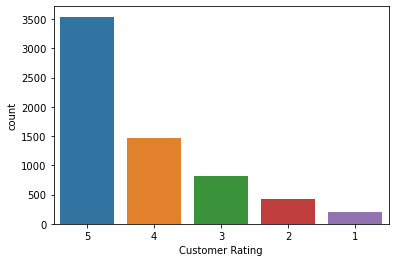

In [33]:
df['Customer Rating'].value_counts()
sns.countplot(df["Customer Rating"],order=df['Customer Rating'].value_counts().index)

In [34]:
df['Positive Review Count'].value_counts()

0     2901
1     1143
2      649
3      430
4      282
5      186
6      136
7      104
8       89
9       76
10      69
11      50
12      37
14      33
13      29
17      27
15      25
18      16
16      15
20      13
19      11
25      10
22      10
30      10
23       9
21       8
28       8
29       7
26       6
24       5
27       5
31       5
37       3
32       3
38       3
34       2
35       2
51       2
55       2
33       2
41       2
57       2
65       2
69       1
36       1
40       1
44       1
68       1
84       1
45       1
61       1
87       1
89       1
42       1
54       1
78       1
81       1
43       1
39       1
95       1
Name: Positive Review Count, dtype: Int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Section', ylabel='count'>

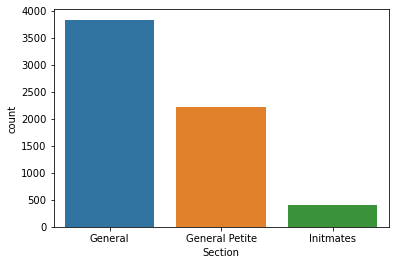

In [35]:
df['Section'].value_counts()
sns.countplot(df["Section"],order=df['Section'].value_counts().index)

In [36]:
df['Department'].value_counts()


Tops        2864
Dresses     1766
Bottoms     1066
Intimate     454
Jackets      262
Trend         34
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

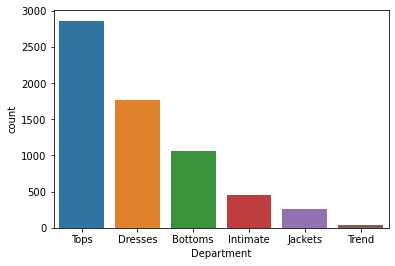

In [37]:
sns.countplot(df["Department"],order=df['Department'].value_counts().index)

In [38]:
df['Category'].value_counts()

Dresses       1764
Knits         1300
Blouses        852
Pants          397
Sweaters       393
Jeans          320
Fine gauge     316
Skirts         255
Jackets        176
Lounge         174
Swim           104
Shorts          92
Outerwear       86
Sleep           54
Intimates       45
Legwear         44
Trend           34
Layering        32
Chemises         1
Pnats            1
Jaens            1
Fineg auge       1
Dressse          1
Swetaers         1
Dersses          1
lBouses          1
Name: Category, dtype: int64

In [39]:
df['Online Time'].value_counts()

7.20     15
12.21    12
9.32     12
4.65     12
6.23     11
         ..
26.64     1
21.72     1
27.32     1
34.91     1
16.74     1
Name: Online Time, Length: 1950, dtype: int64

In [40]:
df['Cost'].value_counts()

-1.00      14
 57.55      6
 109.94     5
 48.45      5
 69.70      5
           ..
 46.51      1
 79.13      1
 55.73      1
 71.69      1
 96.94      1
Name: Cost, Length: 4896, dtype: int64

<AxesSubplot:xlabel='Recommended IND', ylabel='count'>

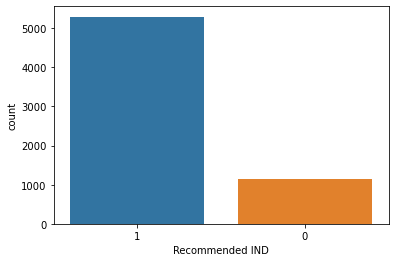

In [41]:
df['Recommended IND'].value_counts()
sns.countplot(df["Recommended IND"],order=df['Recommended IND'].value_counts().index)

# Distributions 

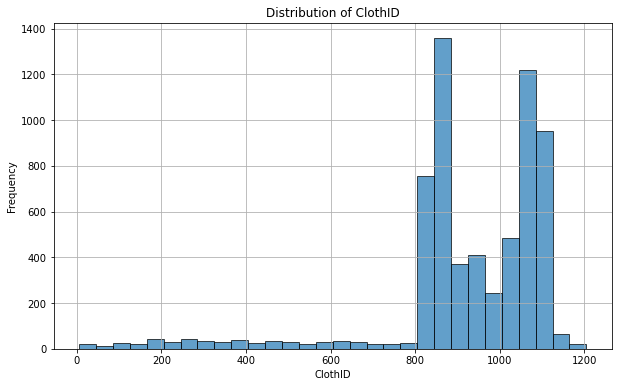

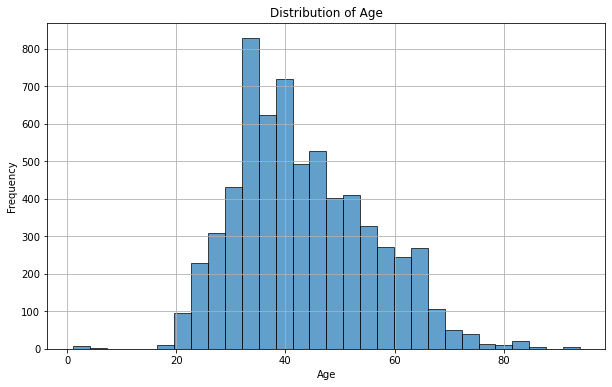

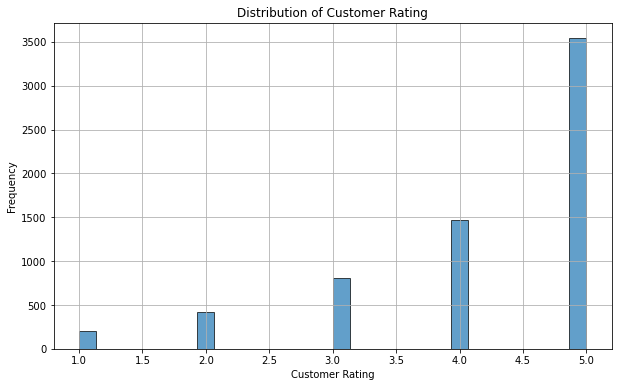

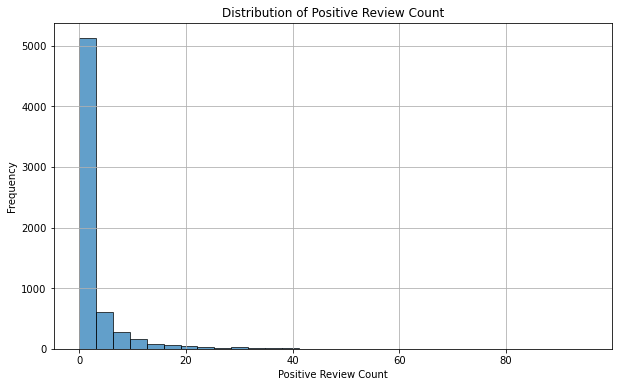

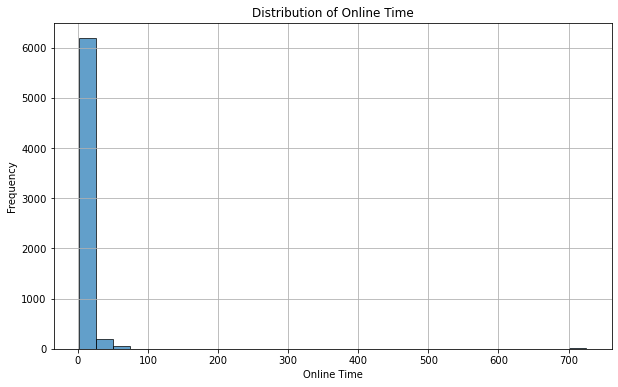

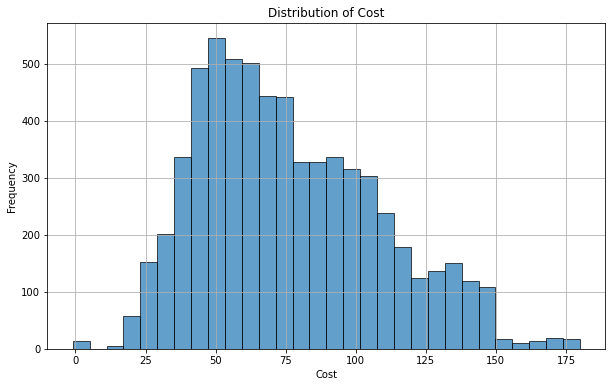

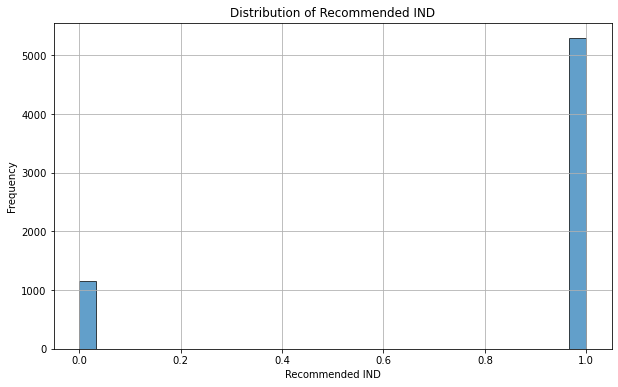

In [42]:
#  distribution of Numeric columns
numeric_columns = ['ClothID', 'Age', 'Customer Rating', 'Positive Review Count', 'Online Time', 'Cost', 'Recommended IND']

# Plot histograms for numeric columns using plt.hist()
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

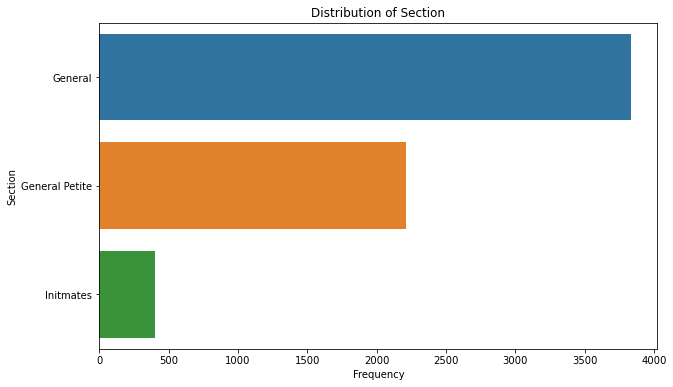

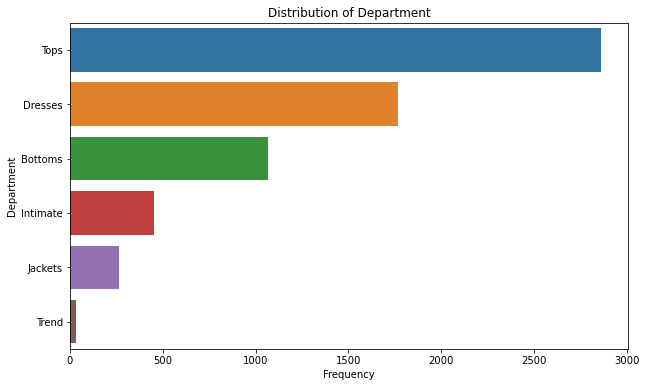

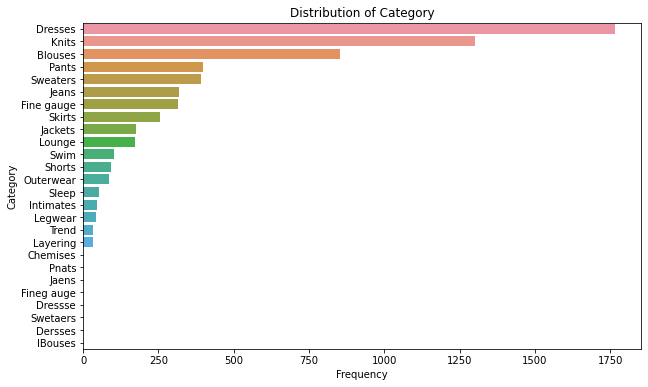

In [43]:
# Categorical columns
categorical_columns = ['Section', 'Department', 'Category']

# Plot bar plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()

# Correlations

Correlation Matrix:
                         ClothID       Age  Customer Rating  \
ClothID                1.000000  0.010251        -0.015210   
Age                    0.010251  1.000000         0.027261   
Customer Rating       -0.015210  0.027261         1.000000   
Positive Review Count  0.036759  0.052619        -0.068781   
Online Time            0.020753  0.013177        -0.183287   
Cost                   0.278703 -0.017042        -0.009958   
Recommended IND       -0.005594  0.034014         0.789353   

                       Positive Review Count  Online Time      Cost  \
ClothID                             0.036759     0.020753  0.278703   
Age                                 0.052619     0.013177 -0.017042   
Customer Rating                    -0.068781    -0.183287 -0.009958   
Positive Review Count               1.000000     0.006454  0.012222   
Online Time                         0.006454     1.000000  0.011368   
Cost                                0.012222     0.01136

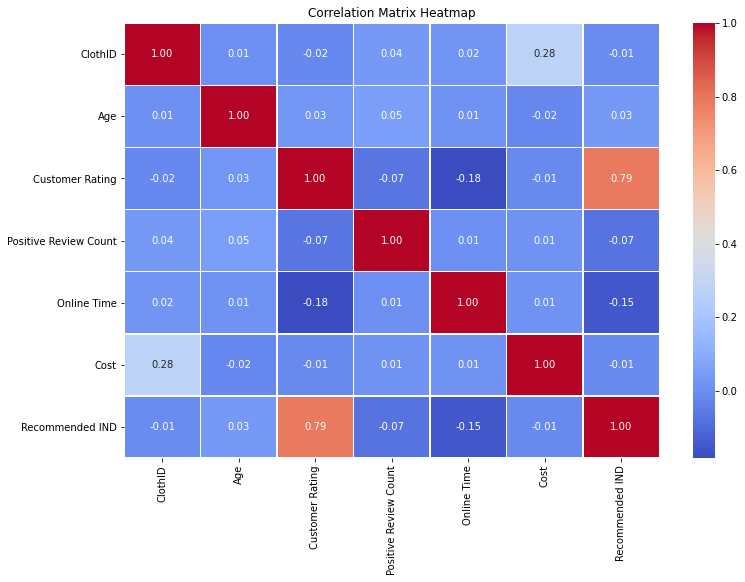

In [44]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualise the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix reveals several key insights into the relationships between the numeric columns in the dataset. Notably, there is a strong positive correlation (0.789) between Customer Rating and Recommended IND, indicating that higher customer ratings are closely linked with product recommendations. Additionally, a moderate positive correlation (0.279) exists between Cost and ClothID, suggesting that higher ClothID values are somewhat associated with higher costs. Most other correlations are weak, such as the near-zero correlation (0.027) between Age and Customer Rating, indicating little to no linear relationship. Overall, the strongest relationship is between customer ratings and recommendations, while other variables exhibit minimal linear associations.

# Data cleaning 

In [45]:
#lets inpect the data 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6446 entries, 0 to 6445
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ClothID                6446 non-null   Int64   
 1   Age                    6446 non-null   Int64   
 2   Review Title           6446 non-null   object  
 3   Customer Rating        6446 non-null   Int64   
 4   Positive Review Count  6446 non-null   Int64   
 5   Section                6446 non-null   category
 6   Department             6446 non-null   category
 7   Category               6446 non-null   category
 8   Online Time            6446 non-null   float64 
 9   Cost                   6446 non-null   float64 
 10  Recommended IND        6446 non-null   Int64   
dtypes: Int64(5), category(3), float64(2), object(1)
memory usage: 455.0+ KB
None


In [46]:
# Display summary statistics
print(df.describe(include='all'))

            ClothID          Age Review Title  Customer Rating  \
count   6446.000000  6446.000000         6446      6446.000000   
unique          NaN          NaN         5084              NaN   
top             NaN          NaN     Love it!              NaN   
freq            NaN          NaN           46              NaN   
mean     921.746975    43.306392          NaN         4.196711   
std      199.521426    12.417997          NaN         1.089236   
min        5.000000     1.000000          NaN         1.000000   
25%      862.000000    34.000000          NaN         4.000000   
50%      936.000000    41.000000          NaN         5.000000   
75%     1078.000000    52.000000          NaN         5.000000   
max     1205.000000    94.000000          NaN         5.000000   

        Positive Review Count  Section Department Category  Online Time  \
count             6446.000000     6446       6446     6446  6446.000000   
unique                    NaN        3          6       2

# Duplicates

In [47]:
#Lets check for duplicates 
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


# Missing Values

In [48]:
#lets check for missing values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 ClothID                  0
Age                      0
Review Title             0
Customer Rating          0
Positive Review Count    0
Section                  0
Department               0
Category                 0
Online Time              0
Cost                     0
Recommended IND          0
dtype: int64


# Standardize categorical values

In [49]:

df['Section'] = df['Section'].str.strip().str.title()
df['Department'] = df['Department'].str.strip().str.title()
df['Category'] = df['Category'].str.strip().str.title()

# check for Typos and spelling mistakes
we can see there are spelling mistakes in the categorical columns
Spelling mistake in "Section" Column

In [50]:
# spelling mistake -Initmates
print("Unique values in Section column before correction:\n", df['Section'].unique())

Unique values in Section column before correction:
 ['General Petite' 'General' 'Initmates']


In [51]:
df['Section'] = df['Section'].replace({
    'Initmates': 'Intimates'})  # Correcting the typo
print("Unique values in Section column after correction:\n", df['Section'].unique())

Unique values in Section column after correction:
 ['General Petite' 'General' 'Intimates']


we can see that Intimate should be replaced as Intimates in Department Column

In [52]:
df['Department'].unique()

array(['Dresses', 'Bottoms', 'Jackets', 'Tops', 'Intimate', 'Trend'],
      dtype=object)

In [53]:
df['Department'] = df['Department'].replace({
    'Intimate': 'Intimates'})
print("Unique values in department column after correction:\n", df['Department'].unique())

Unique values in department column after correction:
 ['Dresses' 'Bottoms' 'Jackets' 'Tops' 'Intimates' 'Trend']


Spelling mistake in "category" Column 

In [54]:
# Mapping dictionary for correcting typos
category_corrections = {
    'Pnats': 'Pants',
    'Jaens': 'Jeans',
    'Fineg Auge': 'Fine Gauge',
    'Dressse': 'Dresses',
    'Swetaers': 'Sweaters',
    'Dersses': 'Dresses',
    'Lbouses': 'Blouses'  # Note the corrected key 'lBouses' to 'Lbouses' for case sensitivity
}
# Correct typos in the Category column
df['Category'] = df['Category'].replace(category_corrections)

# Verify corrections
print("Unique values in Category column after correction:\n", df['Category'].value_counts())

Unique values in Category column after correction:
 Dresses       1766
Knits         1300
Blouses        853
Pants          398
Sweaters       394
Jeans          321
Fine Gauge     317
Skirts         255
Jackets        176
Lounge         174
Swim           104
Shorts          92
Outerwear       86
Sleep           54
Intimates       45
Legwear         44
Trend           34
Layering        32
Chemises         1
Name: Category, dtype: int64


I also observed that The Cost column has a minimum value of -1.000000, which is invalid since cost should be non-negative

In [55]:
df['Cost'] = df['Cost'].apply(lambda x: x if x >= 0 else None)
df['Cost'] = df['Cost'].fillna(df['Cost'].median())
print(df.describe(include='all'))

            ClothID          Age Review Title  Customer Rating  \
count   6446.000000  6446.000000         6446      6446.000000   
unique          NaN          NaN         5084              NaN   
top             NaN          NaN     Love it!              NaN   
freq            NaN          NaN           46              NaN   
mean     921.746975    43.306392          NaN         4.196711   
std      199.521426    12.417997          NaN         1.089236   
min        5.000000     1.000000          NaN         1.000000   
25%      862.000000    34.000000          NaN         4.000000   
50%      936.000000    41.000000          NaN         5.000000   
75%     1078.000000    52.000000          NaN         5.000000   
max     1205.000000    94.000000          NaN         5.000000   

        Positive Review Count  Section Department Category  Online Time  \
count             6446.000000     6446       6446     6446  6446.000000   
unique                    NaN        3          6       1

The Online Time ranges from 1.618914 to 725.315671, with a mean of 11.750809 and a high standard deviation (31.195386). The maximum value seems unusually high.So i suggest it has some outliers which needs to be capped

# outliers

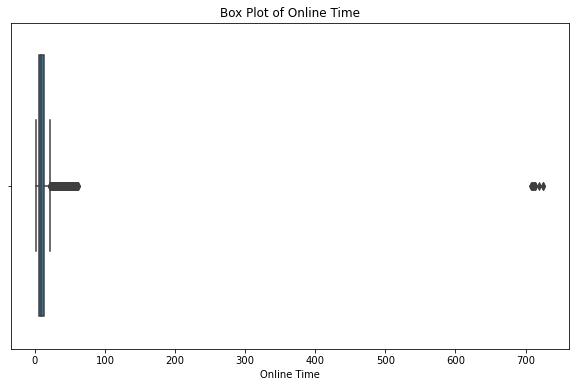

In [56]:
#checking and handling outliers 
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Online Time'])
plt.title('Box Plot of Online Time')
plt.xlabel('Online Time')
plt.show()

In [57]:
# Cap outliers in Online Time
q1 = df['Online Time'].quantile(0.25)
q3 = df['Online Time'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['Online Time'] = df['Online Time'].clip(lower=lower_bound, upper=upper_bound)

# Verify changes in Online Time
print(df['Online Time'].describe())

count    6446.000000
mean        9.840901
std         4.959634
min         1.620000
25%         6.030000
50%         9.200000
75%        12.440000
max        22.055000
Name: Online Time, dtype: float64


Based on the updated summary statistics for the Online Time column, 
it appears that the outliers have been successfully capped. The maximum value is 
now 22.067650, which is significantly lower than the previous maximum of 725.315671. 
This suggests that the capping strategy has effectively handled extreme values.

In [58]:
# Validate data integrity
assert df['Age'].min() > 0, "Age should be a positive integer"
assert df['Customer Rating'].between(1, 5).all(), "Customer Rating should be between 1 and 5"
assert df['Positive Review Count'].min() >= 0, "Positive Review Count should be non-negative"
assert df['Cost'].min() >= 0, "Cost should be non-negative"
assert df['Recommended IND'].isin([0, 1]).all(), "Recommended IND should be 0 or 1"

In [59]:
print(df.describe(include='all'))

            ClothID          Age Review Title  Customer Rating  \
count   6446.000000  6446.000000         6446      6446.000000   
unique          NaN          NaN         5084              NaN   
top             NaN          NaN     Love it!              NaN   
freq            NaN          NaN           46              NaN   
mean     921.746975    43.306392          NaN         4.196711   
std      199.521426    12.417997          NaN         1.089236   
min        5.000000     1.000000          NaN         1.000000   
25%      862.000000    34.000000          NaN         4.000000   
50%      936.000000    41.000000          NaN         5.000000   
75%     1078.000000    52.000000          NaN         5.000000   
max     1205.000000    94.000000          NaN         5.000000   

        Positive Review Count  Section Department Category  Online Time  \
count             6446.000000     6446       6446     6446  6446.000000   
unique                    NaN        3          6       1

# Constructing the Error List Table
Below im contructing the table to record all the errors that was found in the original dataset.

In [60]:
error_list = [
    {
        "datasetNo": "dataset1",
        "indexOfdf": 5211,  
        "Id": 1060,  
        "ColumnName": "Category",
        "Original": "Pnats",
        "Modified": "Pants",
        "ErrorType": "Typo",
        "Fixing": "Changed 'Pnats' to 'Pants' because it was a misspelling."
    },
    {
        "datasetNo": "dataset1",
        "indexOfdf": 2613,  
        "Id": 1033,  
        "ColumnName": "Category",
        "Original": "Jaens",
        "Modified": "Jeans",
        "ErrorType": "Typo",
        "Fixing": "Changed 'Jaens' to 'Jeans' because it was a misspelling."
    },
    {
        "datasetNo": "dataset1",
        "indexOfdf": 6151 ,  
        "Id": 909,  
        "ColumnName": "Category",
        "Original": "Fineg auge",
        "Modified": "Fine Gauge",
        "ErrorType": "Typo",
        "Fixing": "Changed 'Fineg auge' to 'Fine Gauge' because it was a misspelling."
    },
    {
        "datasetNo": "dataset1",
        "indexOfdf": 5740,  
        "Id": 1110, 
        "ColumnName": "Category",
        "Original": "Dressse",
        "Modified": "Dresses",
        "ErrorType": "Typo",
        "Fixing": "Changed 'Dressse' to 'Dresses' because it was a misspelling."
    },
    {
        "datasetNo": "dataset1",
        "indexOfdf": 364,  
        "Id": 940,  
        "ColumnName": "Category",
        "Original": "Swetaers",
        "Modified": "Sweaters",
        "ErrorType": "Typo",
        "Fixing": "Changed 'Swetaers' to 'Sweaters' because it was a misspelling."
    },
    {
        "datasetNo": "dataset1",
        "indexOfdf": 1565,  
        "Id": 1083, 
        "ColumnName": "Category",
        "Original": "Dersses",
        "Modified": "Dresses",
        "ErrorType": "Typo",
        "Fixing": "Changed 'Dersses' to 'Dresses' because it was a misspelling."
    },
    {
        "datasetNo": "dataset1",
        "indexOfdf": 348,  
        "Id": 829,  
        "ColumnName": "Category",
        "Original": "lBouses",
        "Modified": "Blouses",
        "ErrorType": "Typo",
        "Fixing": "Changed 'Lbouses' to 'Blouses' because it was a misspelling."
    },
    {
        "datasetNo": "dataset1",
        "indexOfdf": "All",  
        "Id": "All",  
        "ColumnName": "Department",
        "Original": "Intimate",
        "Modified": "Intimates",
        "ErrorType": "Typo",
        "Fixing": "Changed 'Intimate' to 'Intimates' because it was a misspelling."
    },
    {
        "datasetNo": "dataset1",
        "indexOfdf": 'ALL of Online Time',  
        "Id": 'ALL of Online Time',  
        "ColumnName": "Online Time",
        "Original": "725.315671",
        "Modified": "22.067650",
        "ErrorType": "Outlier",
        "Fixing": "Capped 'Online Time' to 22.067650 to handle outliers."
    },
    {
        "datasetNo": "dataset1",
        "indexOfdf": 678,  
        "Id": 909,  
        "ColumnName": "Cost",
        "Original": "-1.000000",
        "Modified": "76.478235",
        "ErrorType": "Violation of Integrity Constraint",
        "Fixing": "Changed negative 'Cost' to median value 76.478235 to fix integrity constraint."
    }
]

error_df = pd.DataFrame(error_list)
print(error_df)

  datasetNo           indexOfdf                  Id   ColumnName    Original  \
0  dataset1                5211                1060     Category       Pnats   
1  dataset1                2613                1033     Category       Jaens   
2  dataset1                6151                 909     Category  Fineg auge   
3  dataset1                5740                1110     Category     Dressse   
4  dataset1                 364                 940     Category    Swetaers   
5  dataset1                1565                1083     Category     Dersses   
6  dataset1                 348                 829     Category     lBouses   
7  dataset1                 All                 All   Department    Intimate   
8  dataset1  ALL of Online Time  ALL of Online Time  Online Time  725.315671   
9  dataset1                 678                 909         Cost   -1.000000   

     Modified                          ErrorType  \
0       Pants                               Typo   
1       Jeans  

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \<student\_id\>_dataset1_solution.csv
- \<student\_id\>_errorlist.csv

In [61]:
# code to save output data
error_df.to_csv("s3997064_errorlist.csv", index=False)
# Save the cleaned DataFrame to a CSV file
df.to_csv("s3997064_dataset1_solution.csv", index=False)


## Summary
 Task 1 and 2 involved a comprehensive process of parsing and cleansing the dataset to address various data quality issues. By implementing these approaches, the dataset was transformed into a clean and structured format, ready for further analysis and integration with other dataset in subsequent tasks.